In [43]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn

In [11]:
dados = pd.read_csv("../dados/netflix_titles.csv", encoding='latin1')
dados.shape

(8809, 26)

Há colunas com nomes vazios:

In [14]:
dados.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Verificando quais são essas colunas:

In [17]:
dados.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

Verificando Nulos do dataset e removendo eles

In [20]:
dados.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [22]:
colunas_selec = [f'Unnamed: {i}' for i in range(12, 25)]
dados.drop(columns=colunas_selec, inplace = True)

Checando se existem dados categóricos nulos:

In [25]:
dados.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 25     8809
dtype: int64

Removendo últimos dados numéricos nulos da Coluna Unnamed: 25
e 
Substituindo dados nulos categóricos NaN por Unknown

In [28]:
dados.drop(columns = ['Unnamed: 25'], inplace=True)
dados.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [30]:
dados['director'].fillna('Unknown', inplace=True)
dados['cast'].fillna('Unknown', inplace=True)
dados['country'].fillna('Unknown', inplace=True)
dados.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [32]:
dados.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)
dados.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [34]:
dados.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Visualização dos Dados:

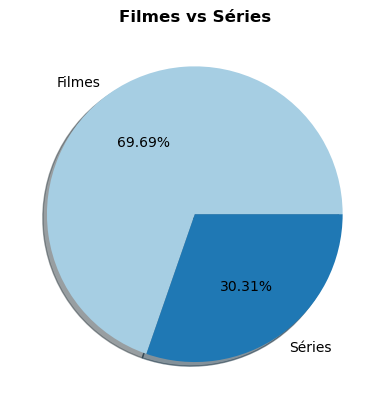

In [47]:
dimensao = dados['type'].value_counts()
labels = 'Filmes', 'Séries'
color = srn.color_palette('Paired')

plt.pie(dimensao, colors=color, labels=labels, autopct='%1.2f%%', shadow=bool)
plt.title('Filmes vs Séries', fontweight='bold')
plt.show()

Dessa forma conseguimos perceber que os filmes claramenta superam a quantidade de Séries dentro da plataforma!

- Quais países tem as maiores quantidades de filmes produzidos dentro da Netflix?- Quais países tem mais séries produzidas?
- Quais países tem as maiores quantidades de produtos dentro da plataforma?x?

In [ ]:
filmes = [(dados['type']) == 'Movie']

Salvando para visualização no PowerBI

In [269]:
dados.to_csv('../dados/dataset_tratado.csv', index = False)